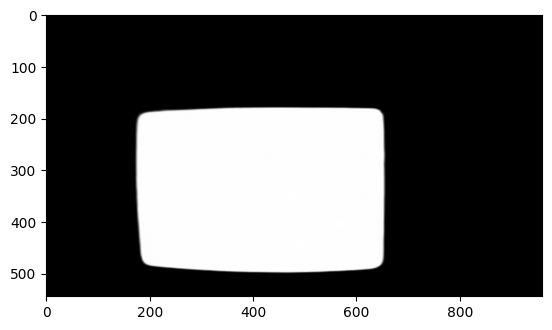

In [22]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("C:/Users/USER/Documents/Trabajo/Cedulas/imagenes_cedula_peq/Cedula_Guayaquil/e8848d60-ImagenCedula_208.jpg") 
img= img.convert("RGB").rotate(0)
data = remove(img,only_mask=True)
plt.imshow(data,cmap="gray")
plt.show()
